## Observations and Insights 

# Observations:
1. Capomulin & Ramicane were the most successful in resulting in a smaller tumor volume, with tighter distribution to the mean as well.
2. Capomulin treatment seems to be effective beginning around day 12, at which point the tumor volume drops significantly.
3. For Capomulin treatment, there is a mild correlation between mouse weight and average tumor volume (0.53).


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

In [2]:
# Checking the number of mice in the DataFrame.
combined_data["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data = combined_data.drop_duplicates(subset=["Mouse ID"], keep="last")

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(clean_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9        k403     Ramicane    Male          21          16         45   
19       s185    Capomulin  Female           3          17         45   
29       x401    Capomulin  Female          16          15         45   
39       m601    Capomulin    Male          22          17         45   
49       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1859     z314     Stelasyn  Female          21          28          5   
1862     z435     Propriva  Female          12          26         10   
1872     z581    Infubinol  Female          24          25         45   
1882     z795     Naftisol  Female          13          29         45   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
9              22.050126                 1  
19             23.343598         

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# group by drug regimen
regimen_df = clean_data.groupby("Drug Regimen")

# then do the math
tumor_vol_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_vol_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_vol_std = regimen_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = regimen_df["Tumor Volume (mm3)"].sem()

regimen_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = (pd.DataFrame({
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_var,
    "Standard Deviation": tumor_vol_std,
    "Standard Error of the Mean": tumor_vol_sem
})).round(2)
summary_table

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar Plots

In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
# Define x- and y-axis
x_axis = regimen_df["Drug Regimen"]
mice_vol = regimen_df["Mouse ID"]

regimens = regimen_df["Drug Regimen"]
mice = regimen_df["Mouse ID"]
x_axis = np.arange(0, len(regimens))

# regimen_df.head()

# Plot the bar chart with labels
plt.bar(x_axis, regimens, color="b", alpha=0.5, align="center")
# plt.title("Number of mice per treatment")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Mice")

NameError: name 'np' is not defined

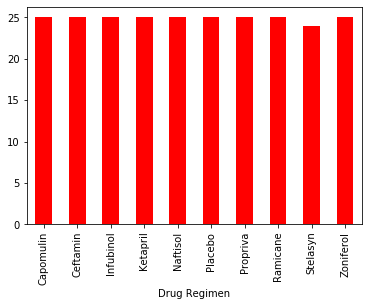

In [29]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
bar_plot = regimen_df["Drug Regimen"].count()
bar_plot.plot(kind="bar", facecolor="red")


## Pie Plots

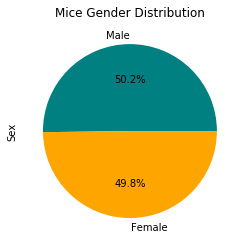

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Groupby mouse gender
gender_df = clean_data["Sex"].value_counts()

# Labels for the sections of the pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["teal", "orange"]

plt.title("Mice Gender Distribution")

plot = gender_df.plot.pie(y=clean_data["Sex"], figsize=(4, 4), autopct='%1.1f%%', colors=colors)

Text(0.5, 1.0, 'Mice Gender Distribution')

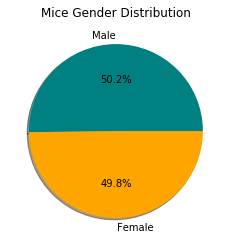

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Groupby mouse gender
gender_df = clean_data["Sex"].value_counts()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["teal", "orange"]

plt.pie(gender_df, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.title("Mice Gender Distribution")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor_vol = clean_data["Tumor Volume (mm3)"]

quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volumes is: {lowerq}")
print(f"The upper quartile of volumes is: {upperq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of volumes is: 45.93471217
The upper quartile of volumes is: 64.95756185
The interquartile range of volumes is: 19.022849680000007
The the median of volumes is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


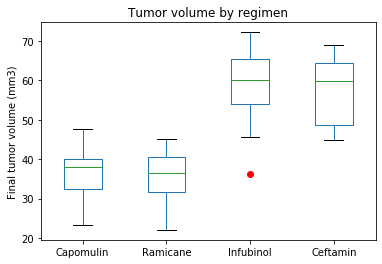

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# filter clean_data for the four regimens
final_tumor_by_drug = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]]
final_capomulin = final_tumor_by_drug.loc[final_tumor_by_drug["Drug Regimen"] == "Capomulin"]
final_ramicane = final_tumor_by_drug.loc[final_tumor_by_drug["Drug Regimen"] == "Ramicane"]
final_infubinol = final_tumor_by_drug.loc[final_tumor_by_drug["Drug Regimen"] == "Infubinol"]
final_ceftamin = final_tumor_by_drug.loc[final_tumor_by_drug["Drug Regimen"] == "Ceftamin"]

# create new dataframe to hold four regimens and their respective tumor volumes
boxplot_df = pd.DataFrame({"Capomulin" : final_capomulin["Tumor Volume (mm3)"],
                            "Ramicane" : final_ramicane["Tumor Volume (mm3)"],
                           "Infubinol" : final_infubinol["Tumor Volume (mm3)"],
                        "Ceftamin" : final_ceftamin["Tumor Volume (mm3)"]})

# create boxplot
boxplot = boxplot_df.boxplot(column = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], grid=False, sym="r")
plt.title("Tumor volume by regimen")
plt.ylabel("Final tumor volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

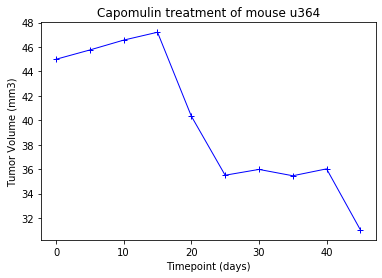

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Identify mouse treated with Capomulin ... looked at regimen_df to find "u364"
u364_df = combined_data.loc[combined_data["Mouse ID"] == "u364"]
u364_x_axis = u364_df["Timepoint"]
u364_y_axis = u364_df["Tumor Volume (mm3)"]

u364_Capomulin, = plt.plot(u364_x_axis, u364_y_axis, marker="+",color="blue", linewidth=1)
plt.title("Capomulin treatment of mouse u364")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

Text(0.5, 0, 'Weight (g)')

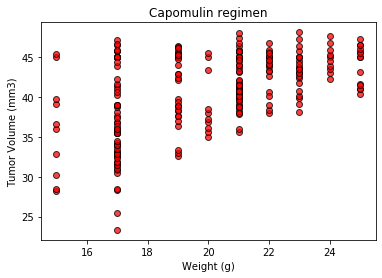

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

capomulin_weight = capomulin_df["Weight (g)"]
capomulin_vol = capomulin_df["Tumor Volume (mm3)"]

plt.scatter(capomulin_weight, capomulin_vol, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Capomulin regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(capomulin_weight,capomulin_vol)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.53


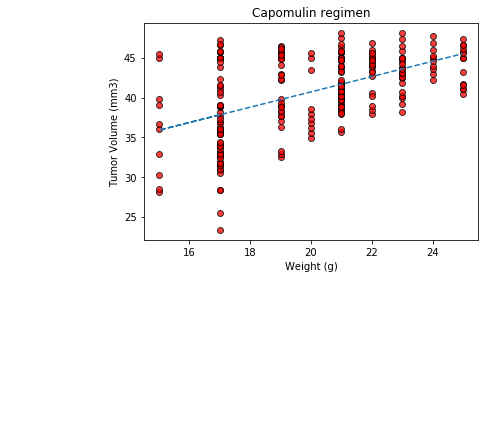

In [18]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(capomulin_weight, capomulin_vol)
vc_fit = vc_slope * capomulin_weight + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(capomulin_weight, capomulin_vol, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(capomulin_weight,vc_fit,"--")
plt.title("Capomulin regimen")
plt.annotate(line_eq,(10,0),fontsize=15,color="black")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()